In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Our goal is to identify patterns within customers. Thus, we'll use K-Mean clustering algorithm. We'll be creating dependent variables which contains finite number of values 1-5 etc, cluster numbers.. which customers belongs to which cluster.

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
print('Rows', data.shape[0])
print('Columns', data.shape[1])

Rows 200
Columns 5


In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

In [16]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

We'll be using columns 'Annual Income (k$)' and  'Spending Score (1-100).'

In [17]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [18]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [22]:
K_Means = KMeans()
K_Means.fit(X)
#This trains our algorithm

KMeans()

To identify number of clusters we hae to use fit_predict()

In [44]:
K_Means = KMeans()
K_Means.fit_predict(X)
#we can set it the number of cluster into any value.
#By KMeans(n_clusters= ) some number

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 7, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 7, 4, 7, 7,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 0, 7, 0, 7, 7, 0, 0, 7, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 6, 0, 6, 5, 6, 5, 6,
       0, 6, 5, 6, 5, 6, 5, 6, 5, 6, 0, 6, 5, 6, 0, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 0, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

Our customers are divided into 8 cluster/groups.

To find the opitmal number of clusters we can use elbow method.

## Elbow Method To Find Opitmal Number of Clusters

In [46]:
wcss=[]
for i in range(1,11):
    K_means =KMeans(n_clusters= i)
    K_means.fit(X)
    wcss.append(K_means.inertia_)

In [47]:
wcss
#sum of squres = ss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25029.25342493588,
 21818.11458845217,
 19710.030271660795]

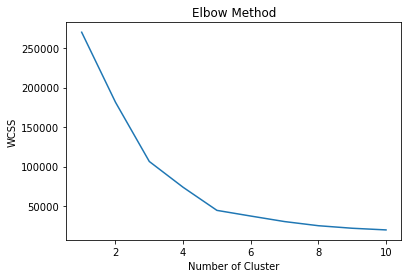

In [49]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

The opitmal number of clusters are 5 due to the graph decreasing up to that point.

## Model Training

In [50]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [51]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
k_means = KMeans(n_clusters=5, random_state=42)

In [54]:
y_pred_means = k_means.fit_predict(X)

In [55]:
y_pred_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

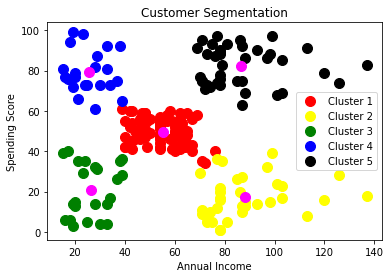

In [60]:
plt.scatter(X.iloc[y_pred_means==0,0], X.iloc[y_pred_means==0,1], s=100, c='red',label='Cluster 1')
plt.scatter(X.iloc[y_pred_means==1,0], X.iloc[y_pred_means==1,1], s=100, c='yellow',label='Cluster 2')
plt.scatter(X.iloc[y_pred_means==2,0], X.iloc[y_pred_means==2,1], s=100, c='green',label='Cluster 3')
plt.scatter(X.iloc[y_pred_means==3,0], X.iloc[y_pred_means==3,1], s=100, c='blue',label='Cluster 4')
plt.scatter(X.iloc[y_pred_means==4,0], X.iloc[y_pred_means==4,1], s=100, c='black',label='Cluster 5')
#Cluster centroid
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s = 100, c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## Simple Predictions

In [62]:
k_means.predict([[15,39]])
#[annual income, spending score]

array([2], dtype=int32)

We got an output of 2 but remember cluster index starts with zero. Thus, this belongs to cluster 3.

## Save The Model

In [63]:
import joblib 

In [64]:
joblib.dump(k_means,'customer_Segmentation')

['customer_Segmentation']

In [65]:
model =joblib.load('customer_Segmentation')

In [66]:
model.predict([[15,39]])

array([2], dtype=int32)